In [35]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split ,cross_val_score,ShuffleSplit
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score,f1_score,classification_report,roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
data=pd.read_csv('master_df1.csv')

In [37]:
data.head()

,Unnamed: 0,CITY,Cust Type,Customer No.,State,Gate Pass Time,Invoice No,KMs Reading,Labour Total,Make,...,Partner Type,Data Origin,Title,Regn State,Invoice Date-Invoice Time,JobCard Date-JobCard Time,Year,Month,Total_Expense,Job_duration(in hrs)
0,0,thane,retail,67849,maharashtra,00:00:00,7005200002,49317,1203.14,general motors,...,Retail,Used Car Dealer,2.0,Karnataka,2015-01-02 11:30:36,2014-12-13 14:29:43,2015,1,6900.76,477.014722
1,1,thnae,retail,84419,maharashtra,00:00:00,7005200003,78584,804.26,tata,...,Retail,Camp-Outdoor,2.0,Maharashtra,2015-01-03 10:07:32,2015-01-02 14:12:18,2015,1,1198.32,19.920556
2,2,thane[w],retail,81055,maharashtra,00:00:00,7005200004,33985,180.19,maruti,...,Retail,Ref-Customer,2.0,Andhra Pradesh,2015-01-03 11:12:57,2015-01-02 11:40:44,2015,1,286.09,23.536944
3,3,thnae,retail,84419,maharashtra,00:00:00,7005200005,78584,0.00,tata,...,Retail,Camp-Outdoor,2.0,Maharashtra,2015-01-03 11:40:44,2015-01-03 10:12:32,2015,1,0.00,1.470000
4,4,thane,retail,18980,maharashtra,00:00:00,7005200006,50057,1202.97,hyundai,...,Retail,Ref-Customer,2.0,Maharashtra,2015-01-03 12:07:17,2015-01-02 10:45:42,2015,1,4291.27,25.359722


In [38]:
data.columns

Index(['Unnamed: 0', 'CITY', 'Cust Type', 'Customer No.', 'State',
       'Gate Pass Time', 'Invoice No', 'KMs Reading', 'Labour Total', 'Make',
       'Model', 'Order Type', 'Plant', 'Print Status', 'Business Partner',
       'Partner Type', 'Data Origin', 'Title', 'Regn State',
       'Invoice Date-Invoice Time', 'JobCard Date-JobCard Time', 'Year',
       'Month', 'Total_Expense', 'Job_duration(in hrs)'],
      dtype='object')

In [39]:
data.head()

,Unnamed: 0,CITY,Cust Type,Customer No.,State,Gate Pass Time,Invoice No,KMs Reading,Labour Total,Make,...,Partner Type,Data Origin,Title,Regn State,Invoice Date-Invoice Time,JobCard Date-JobCard Time,Year,Month,Total_Expense,Job_duration(in hrs)
0,0,thane,retail,67849,maharashtra,00:00:00,7005200002,49317,1203.14,general motors,...,Retail,Used Car Dealer,2.0,Karnataka,2015-01-02 11:30:36,2014-12-13 14:29:43,2015,1,6900.76,477.014722
1,1,thnae,retail,84419,maharashtra,00:00:00,7005200003,78584,804.26,tata,...,Retail,Camp-Outdoor,2.0,Maharashtra,2015-01-03 10:07:32,2015-01-02 14:12:18,2015,1,1198.32,19.920556
2,2,thane[w],retail,81055,maharashtra,00:00:00,7005200004,33985,180.19,maruti,...,Retail,Ref-Customer,2.0,Andhra Pradesh,2015-01-03 11:12:57,2015-01-02 11:40:44,2015,1,286.09,23.536944
3,3,thnae,retail,84419,maharashtra,00:00:00,7005200005,78584,0.00,tata,...,Retail,Camp-Outdoor,2.0,Maharashtra,2015-01-03 11:40:44,2015-01-03 10:12:32,2015,1,0.00,1.470000
4,4,thane,retail,18980,maharashtra,00:00:00,7005200006,50057,1202.97,hyundai,...,Retail,Ref-Customer,2.0,Maharashtra,2015-01-03 12:07:17,2015-01-02 10:45:42,2015,1,4291.27,25.359722


In [40]:

data[data['Job_duration(in hrs)']<0]

,Unnamed: 0,CITY,Cust Type,Customer No.,State,Gate Pass Time,Invoice No,KMs Reading,Labour Total,Make,...,Partner Type,Data Origin,Title,Regn State,Invoice Date-Invoice Time,JobCard Date-JobCard Time,Year,Month,Total_Expense,Job_duration(in hrs)
351463,358893,chennai,retail,182085,tamil nadu,00:00:00,7167000988,62001,0.0,maruti,...,Retail,Camp-Outdoor,1.0,Tamil Nadu,2016-05-02 15:12:11,2016-05-02 15:12:44,2016,5,0.0,-0.009167


In [41]:
data.drop(index=351463,axis=0,inplace=True)

In [42]:
data.shape

(479547, 25)

In [43]:
data.columns

Index(['Unnamed: 0', 'CITY', 'Cust Type', 'Customer No.', 'State',
       'Gate Pass Time', 'Invoice No', 'KMs Reading', 'Labour Total', 'Make',
       'Model', 'Order Type', 'Plant', 'Print Status', 'Business Partner',
       'Partner Type', 'Data Origin', 'Title', 'Regn State',
       'Invoice Date-Invoice Time', 'JobCard Date-JobCard Time', 'Year',
       'Month', 'Total_Expense', 'Job_duration(in hrs)'],
      dtype='object')

In [44]:
Make_freq=data.groupby(["Make","Model","CITY",'Order Type']).agg({"Invoice No":'count',"Total_Expense":'mean',"Job_duration(in hrs)":'mean'})
Make_freq=Make_freq.reset_index()

Make_freq.head()

ltv_make_model_r=Make_freq.copy()
ltv_make_model_r["LTV"] = ltv_make_model_r["Invoice No"] * ltv_make_model_r["Total_Expense"]
ltv_make_model_r.head()

,Make,Model,CITY,Order Type,Invoice No,Total_Expense,Job_duration(in hrs),LTV
0,audi,a4,a nagar,running repairs,1,3508.88,0.268056,3508.88
1,audi,a4,bangalore,running repairs,1,43669.84,28.306389,43669.84
2,audi,a4,bbsr,running repairs,1,330.50,0.056944,330.50
3,audi,a4,bengaluru,running repairs,1,0.00,839.515278,0.00
4,audi,a4,bhayander,running repairs,1,750.25,0.140278,750.25


In [45]:
ltv_make_model_r.shape

(91363, 8)

In [46]:
df=ltv_make_model_r[ltv_make_model_r['LTV'] !=0]

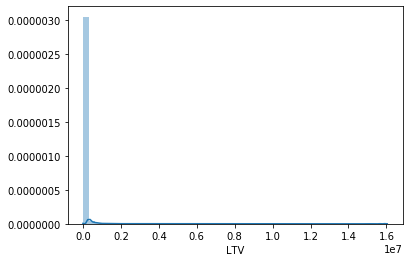

In [47]:
sns.distplot(df['LTV'])
plt.show()

In [48]:
df.shape

(84292, 8)

In [49]:
print("minimum LTV :-",df['LTV'].min())
print("maximum LTV :-",df['LTV'].max())
print("mean LTV :-",df['LTV'].mean())

minimum LTV :- 0.01
maximum LTV :- 16041460.490000004
mean LTV :- 42209.36212095896


In [51]:
print("0.05 quantile :-",df['LTV'].quantile(0.05))
print("0.25 quantile :-",df['LTV'].quantile(0.25))
print("0.50 quantile :-",df['LTV'].quantile(0.50))
print("0.75 quantile :-",df['LTV'].quantile(0.75))
print("0.95 quantile :-",df['LTV'].quantile(0.95))
print("minimum LTV :-",df['LTV'].min())
print("maximum LTV :-",df['LTV'].max())
print("mean LTV :-",df['LTV'].mean())

0.05 quantile :- 201.0
0.25 quantile :- 1715.045
0.50 quantile :- 7340.590000000001
0.75 quantile :- 24398.36
0.95 quantile :- 150804.96899999987
minimum LTV :- 0.01
maximum LTV :- 16041460.490000004
mean LTV :- 42209.36212095896


In [55]:
print(df[df["LTV"]<=7340.590000000001].shape)
print(df[(df["LTV"]>7340.590000000001)&(df["LTV"]<=24398.36)].shape)
print(df[df["LTV"]<=16041460.490000004].shape)

(42146, 9)
(21073, 9)
(84292, 9)


In [56]:
bins=[-1,7340.590000000001,24398.36,16041460.490000004]
labels=["Low","Medium","High"]
df["LTV Binned"]=pd.cut(df["LTV"], bins=bins, labels=labels)

C:\Users\USER\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [57]:
df.head()

,Make,Model,CITY,Order Type,Invoice No,Total_Expense,Job_duration(in hrs),LTV,LTV Binned
0,audi,a4,a nagar,running repairs,1,3508.88,0.268056,3508.88,Low
1,audi,a4,bangalore,running repairs,1,43669.84,28.306389,43669.84,High
2,audi,a4,bbsr,running repairs,1,330.50,0.056944,330.50,Low
4,audi,a4,bhayander,running repairs,1,750.25,0.140278,750.25,Low
5,audi,a4,cbe,running repairs,1,1000.40,4.052222,1000.40,Low


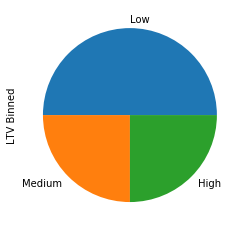

In [58]:

df['LTV Binned'].value_counts(sort=False).plot.pie()
plt.show()

In [61]:
le=LabelEncoder()
df["Make"]=le.fit_transform(df["Make"])
df["Model"]=le.fit_transform(df["Model"])
df["Order Type"]=le.fit_transform(df["Order Type"])
df["CITY"]=le.fit_transform(df["CITY"])

C:\Users\USER\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\USER\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\USER\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = valu

In [62]:
df.head()

,Make,Model,CITY,Order Type,Invoice No,Total_Expense,Job_duration(in hrs),LTV,LTV Binned
0,0,8,381,4,1,3508.88,0.268056,3508.88,Low
1,0,8,1592,4,1,43669.84,28.306389,43669.84,High
2,0,8,1776,4,1,330.50,0.056944,330.50,Low
4,0,8,2033,4,1,750.25,0.140278,750.25,Low
5,0,8,2471,4,1,1000.40,4.052222,1000.40,Low


In [63]:
X=df.drop(["LTV","LTV Binned","Invoice No"],1)
y=df["LTV Binned"]

In [64]:
X.head()

,Make,Model,CITY,Order Type,Total_Expense,Job_duration(in hrs)
0,0,8,381,4,3508.88,0.268056
1,0,8,1592,4,43669.84,28.306389
2,0,8,1776,4,330.50,0.056944
4,0,8,2033,4,750.25,0.140278
5,0,8,2471,4,1000.40,4.052222


In [66]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [67]:
dt = DecisionTreeClassifier(criterion='entropy',max_depth=8,random_state=0)

dt.fit(X_train,y_train)

y_pred_dt = dt.predict(X_test)
y_pred_dt_train = dt.predict(X_train)


In [68]:
list(X)

['Make',
 'Model',
 'CITY',
 'Order Type',
 'Total_Expense',
 'Job_duration(in hrs)']

In [69]:
print("Training Accuracy :-" , accuracy_score(y_test,y_pred_dt))
print("Testing Accuracy :-" ,accuracy_score(y_train,y_pred_dt_train))

Training Accuracy :- 0.7609142676368238
Testing Accuracy :- 0.7641854789505796


In [70]:
Make_year_freq=data.groupby(["Make","Model","Year"]).agg({"Invoice No":'count',"Total_Expense":'mean'})
Make_year_freq=Make_year_freq.reset_index()



In [72]:
Make_year_freq.head()

ltv_make_model_r=Make_year_freq.copy()
ltv_make_model_r["LTV"] = ltv_make_model_r["Invoice No"] * ltv_make_model_r["Total_Expense"]
ltv_make_model_r.head()

,Make,Model,Year,Invoice No,Total_Expense,LTV
0,audi,a4,2012,2,332.400000,664.80
1,audi,a4,2013,4,6209.032500,24836.13
2,audi,a4,2014,10,16488.358000,164883.58
3,audi,a4,2015,21,5676.389524,119204.18
4,audi,a4,2016,37,15789.168649,584199.24


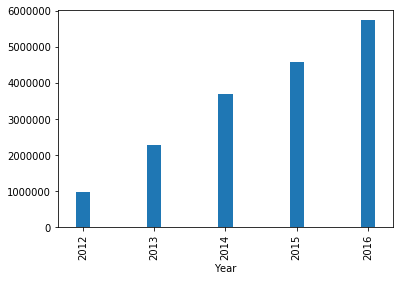

In [73]:
ltv_make_model_r.groupby('Year')['LTV'].mean().plot(kind='bar', width=0.2)